#Project: IBM Machine Learning 


Objective :

 
🎯 Investigate the extent and nature of missing data.

🎯Design and implement an imputation technique for missing data.

🎯Produce a visualization for AAVAIL stakeholders in the US and Singapore markets using your modified dataset.


# What is data imputation?
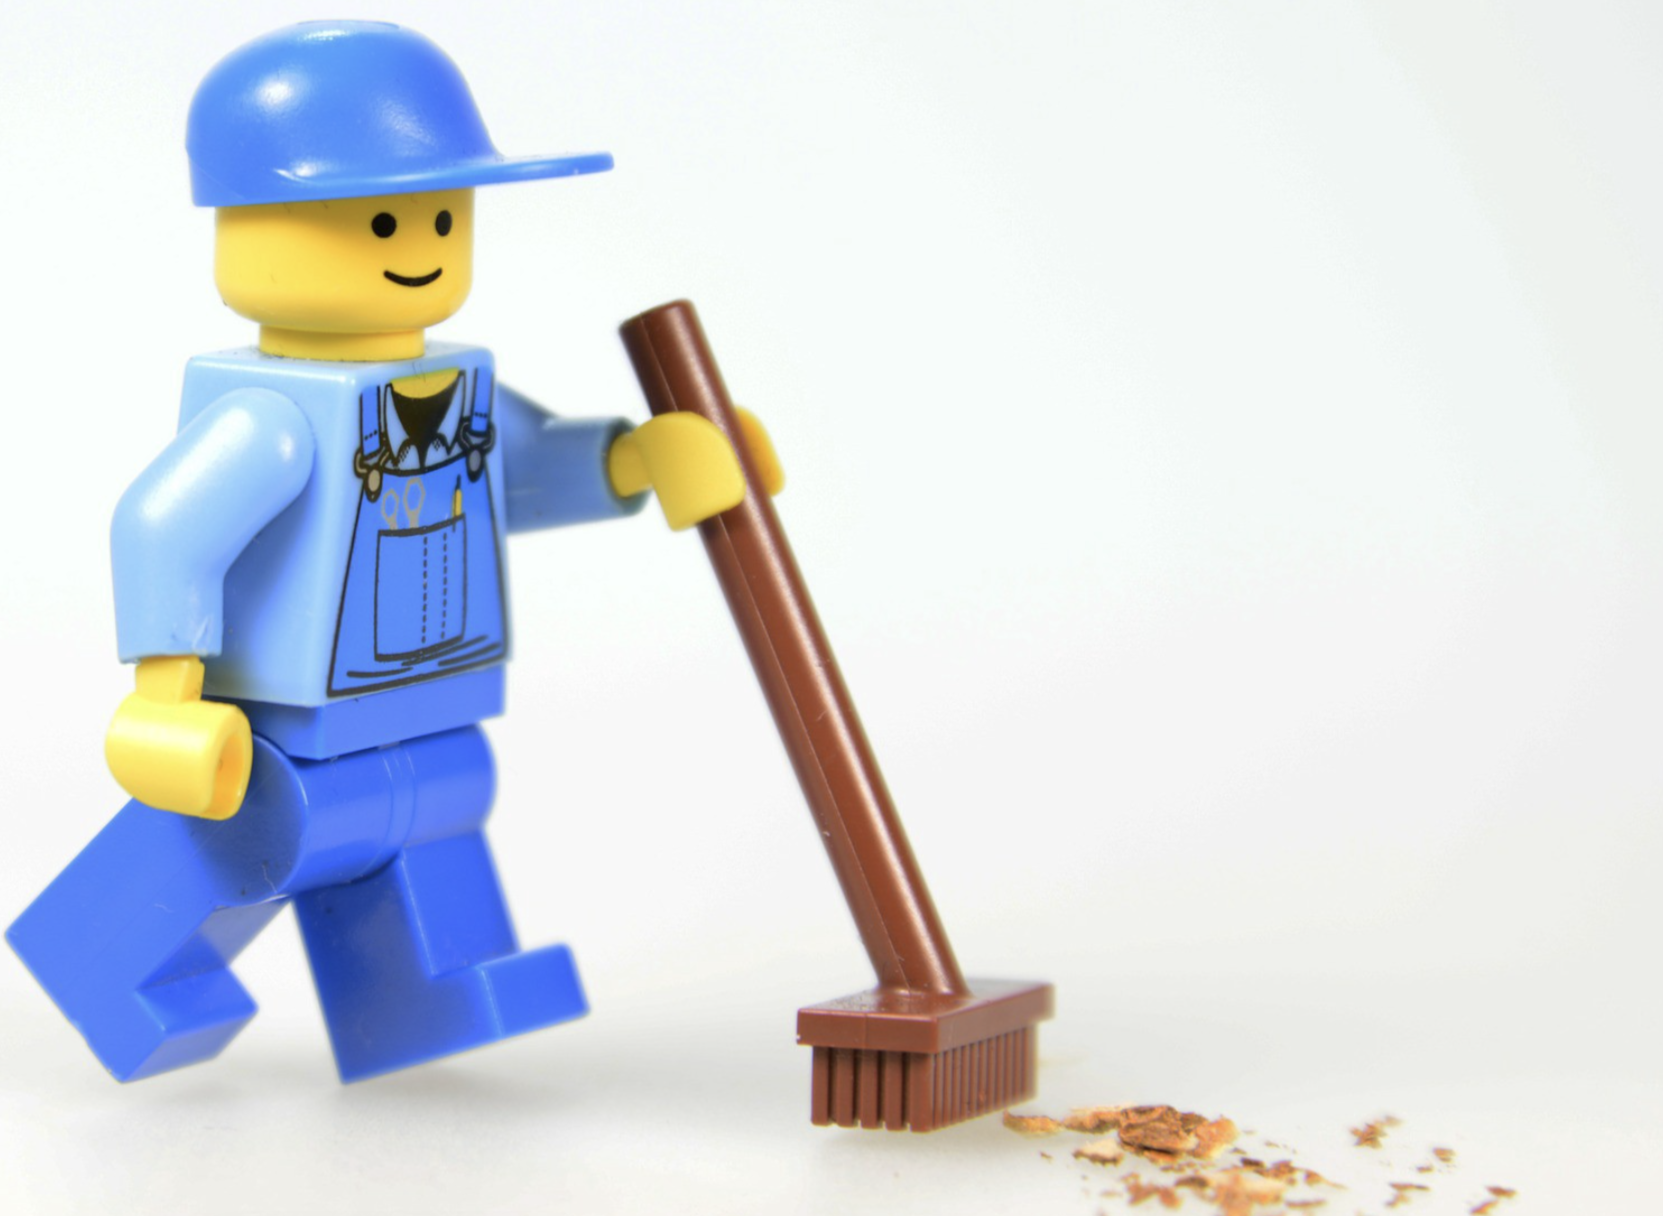

**Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.**
# Why Imputation is Important?


What is Imputation?

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset. These techniques are used because removing the data from the dataset every time is not feasible and can lead to a reduction in the size of the dataset to a large extend, which not only raises concerns for biasing the dataset but also leads to incorrect analysis.


 
 

Why Imputation is Important?


We use imputation because Missing data can cause the below issues: –

Incompatible with most of the Python libraries used in Machine Learning:- Yes, you read it right. While using the libraries for ML(the most common is skLearn), they don’t have a provision to automatically handle these missing data and can lead to errors.
Distortion in Dataset:- A huge amount of missing data can cause distortions in the variable distribution i.e it can increase or decrease the value of a particular category in the dataset.
Affects the Final Model:- the missing data can cause a bias in the dataset and can lead to a faulty analysis by the model.
Another and the most important reason is “We want to restore the complete dataset”. This is mostly in the case when we do not want to lose any(more of) data from our dataset as all of it is important, & secondly, dataset size is not very big, and removing some part of it can have a significant impact on the final model.



In [ ]:
#Importing the necessary libraries
from google.colab import drive
drive.mount('/content/drive')
import csv
import pandas as pd
import numpy as np
from numpy import nan #To detect missing values
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import folium 
%matplotlib inline
SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing and opening the dataset
datavisu = pd.read_csv("/content/drive/MyDrive/aavail-data-visualization.csv")
datavisu.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


In [ ]:
#Observing if there are null values
datavisu.describe(include="all")

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
count,1000.000000,1000,1000.000000,1000,1000,928,954.000000
unique,NaN,2,NaN,1000,2,3,NaN
top,NaN,united_states,NaN,Kasen Todd,True,aavail_basic,NaN
freq,NaN,700,NaN,1,711,339,NaN
mean,500.500000,NaN,27.532000,NaN,NaN,NaN,17.780922
std,288.819436,NaN,9.120096,NaN,NaN,NaN,4.752115
min,1.000000,NaN,14.000000,NaN,NaN,NaN,1.000000
25%,250.750000,NaN,21.000000,NaN,NaN,NaN,15.000000
50%,500.500000,NaN,24.000000,NaN,NaN,NaN,19.000000
75%,750.250000,NaN,33.000000,NaN,NaN,NaN,21.000000



# 🎯 **Question 1:**

Investigate the new dataset and load a view or views that summarize the nature and extent of the missing data. Be sure to include text to make your visualization clearer.

<Figure size 720x432 with 0 Axes>

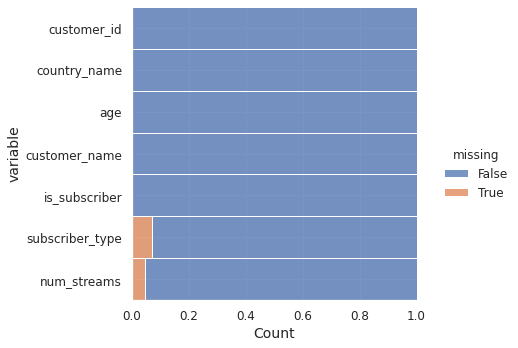

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=datavisu.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


You can preview missing data in two columns. They are: subscriber_type and num_streams.

 📌 I used the heatmap below to identify specific quantifiable numbers.

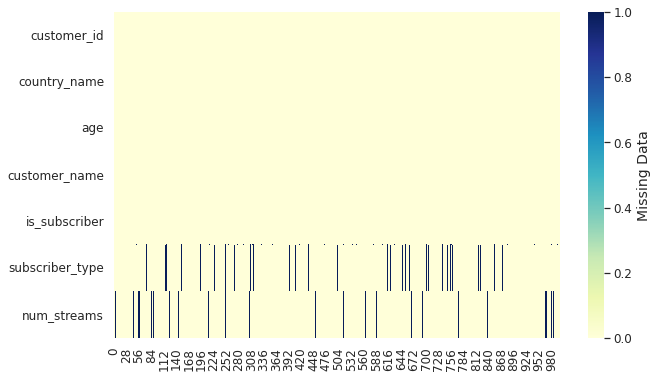

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(datavisu.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



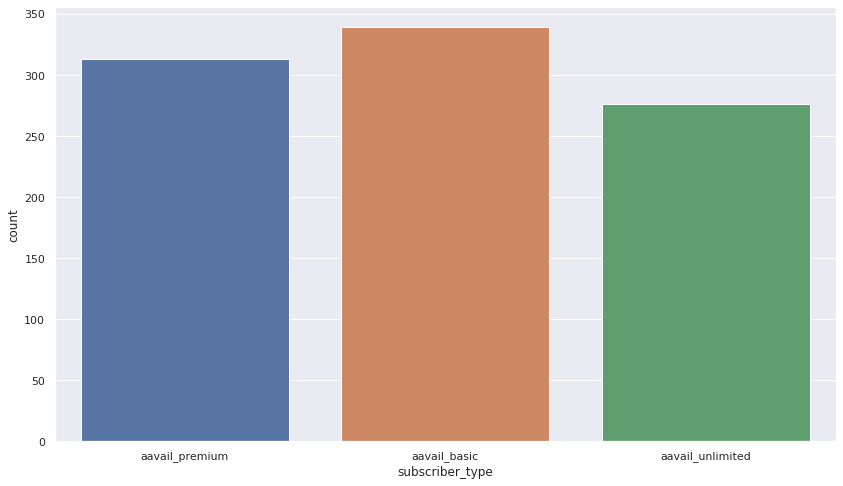

In [ ]:
#graphically observing signature types
sns.set(rc={'figure.figsize': (14, 8)}) 
sns.countplot(datavisu['subscriber_type'])

In [ ]:
#looking at the missing data by column
print("Missing Value Summary\n{}".format("-"*35))
print(datavisu.isnull().sum(axis = 0))

Missing Value Summary
-----------------------------------
customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64


When looking at the analysis above, two columns were discovered with missing data. 
They are: 
Subscriber_type 72
num_streams 46

# 🎯  **Question 2:**

Based on your investigation of the missing data, design and implement an imputation technique (or several techniques) to replace it. Describe your approach in 3-5 sentences. Be sure to include a brief discussion of the assumptions you made about the missing data, if any, that led you to implement this particular imputation strategy.

# **Purpose of imputing data.**

 As mentioned in the analysis above, we found some missing values ​​in some columns of the dataset. Our model cannot work efficiently on null values, and in some cases removing rows with null values ​​cannot be considered an option as it leads to loss of data from other functionality. Based on this premise, I will impute the data.

**Initially I was going to make an imputation with the sklearn library, but I decided to simplify and use pandas**

In [ ]:
#from sklearn.base import ClassifierMixin
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = np.nan,
                        #strategy ='mean')


# **🎯Design and implement an imputation technique for missing data.**
* Fill missing data with Pandas




In [ ]:
datavisu["subscriber_type"].fillna("missing", inplace=True)
datavisu["num_streams"].fillna("missing", inplace=True)

In [ ]:
#Viewing whether the imputation was successful
datavisu.isna().sum()

customer_id        0
country_name       0
age                0
customer_name      0
is_subscriber      0
subscriber_type    0
num_streams        0
dtype: int64

# 🎯 Question 3:
Produce a visualization for AAVAIL stakeholders in the US and Singapore markets using your modified dataset.

<Figure size 720x432 with 0 Axes>

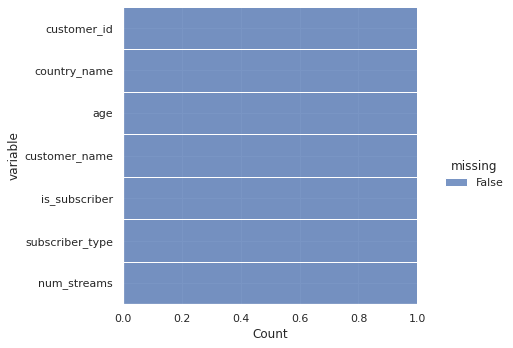

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=datavisu.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



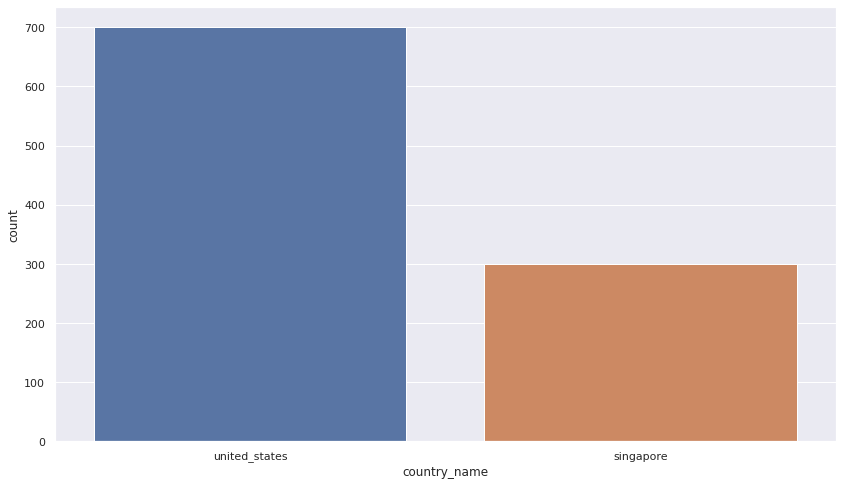

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)}) 
sns.countplot(datavisu['country_name'])

Based on the graph above, it is possible to state that the country with the highest number of subscribers is the USA.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



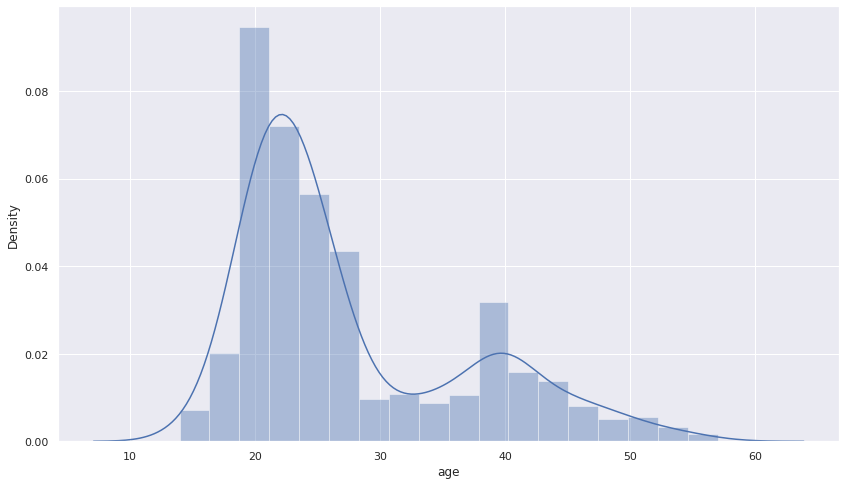

In [ ]:
sns.distplot(datavisu['age'])

The age group with the most active subscribers is 20-29 years old.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



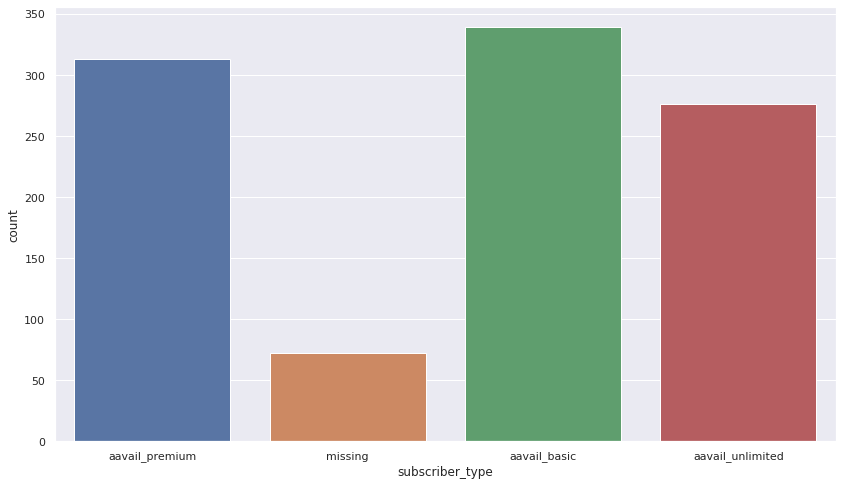

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)}) 
sns.countplot(datavisu['subscriber_type'])

The same graph was plotted above, however only three bars were shown: the basic, unlimited and premium plans. after the imputation was done, the missing bar was added and the distributions changed.
Based on the graph above, it is possible to state that the basic plan has the highest number of subscribers, followed by the premium plan and finally the unlimited plan.

In [ ]:
# create a Stamen Toner map of the world centered around SINGAPORE
world_map = folium.Map(location=[1.28333, -103.85], zoom_start=4, tiles='Stamen Toner')

# display map
world_map